In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
import io
import os

#Step 1: Reading Dataset
df = pd.read_csv('Chemical Plant Dataset.csv')

In [6]:
print(df)

    x1  x2  x3   y
0   80  27  89  42
1   80  27  88  37
2   75  25  90  37
3   62  24  87  28
4   62  22  87  18
5   62  23  87  18
6   62  24  93  19
7   62  24  93  20
8   58  23  87  15
9   58  18  80  14
10  58  18  89  14
11  58  17  88  13
12  58  18  82  11
13  58  19  93  12
14  50  18  89   8
15  50  18  86   7
16  50  19  72   8
17  50  19  79   8
18  50  20  80   9
19  56  20  82  15
20  70  20  91  15


In [7]:
encoder = LabelEncoder()

x1 = df['x1'] #x1 column represents Operation Time(seconds)
x2 = df['x2'] #x2 column represents Coolant Temperature(celcius)
x3 = df['x3'] #x3 column represents Transformed acid concentration
y = df["y"] #y coulnmn represents the percentage of unprocessed ammonia

df['x1'] = encoder.fit_transform(df['x1'])
df['x2'] = encoder.fit_transform(df['x2'])
df['x3'] = encoder.fit_transform(df['x3'])
df['y'] = encoder.fit_transform(df['y'])

print(df)

    x1  x2  x3   y
0    6   8   7  13
1    6   8   6  12
2    5   7   8  12
3    3   6   5  11
4    3   4   5   8
5    3   5   5   8
6    3   6  10   9
7    3   6  10  10
8    2   5   5   7
9    2   1   2   6
10   2   1   7   6
11   2   0   6   5
12   2   1   3   3
13   2   2  10   4
14   0   1   7   1
15   0   1   4   0
16   0   2   0   1
17   0   2   1   1
18   0   3   2   2
19   1   3   3   7
20   4   3   9   7


In [4]:
#Step 2: Parameter initialization
theta=[df['x1'].mean(),df['x2'].mean(),df['x3'].mean(),df['y'].mean()]

count = 0
for i in range(100):

    print()
    print("iteration number:", count)
    count += 1
    h = [] #hypothesis list
    m = len(x1)

    # Step 3: Hypothesis Function
    for i in range(m):
        h.append(theta[0] + theta[1] * x1[i] + theta[2] * x2[i] + theta[3] * x3[i])


    # Step 4: cost function
    error = 0

    for i in range(m):
        error = error + (h[i] - y[i]) ** 2

    J = (1 / (2 * m)) * error
    print("Cost= ",J)

    # Step 5: Gradinet Descent

    alpha = 0.001
    diff_J_theta0 = 0
    diff_J_theta1 = 0
    diff_J_theta2 = 0
    diff_J_theta3 = 0

    for i in range(m):

        diff_J_theta0 = diff_J_theta0 + (h[i] - y[i])
        diff_J_theta1 = diff_J_theta1 + (h[i] - y[i]) * x1[i]
        diff_J_theta2 = diff_J_theta2 + (h[i] - y[i]) * x2[i]
        diff_J_theta3 = diff_J_theta3 + (h[i] - y[i]) * x3[i]

    theta[0] = theta[0] - (alpha / m) * diff_J_theta0

    theta[1] = theta[1] - (alpha / m) * diff_J_theta1

    theta[2] = theta[2] - (alpha / m) * diff_J_theta2

    theta[3] = theta[3] - (alpha / m) * diff_J_theta3

    
    
    for i in range(4):
      print('Theta',i,'= ',theta[i])


iteration number: 0
Cost=  2124.4123204837488
Theta 0 =  2.274759637188209
Theta 1 =  3.3927210884353745
Theta 2 =  5.2128140589569165
Theta 3 =  5.939993197278911

iteration number: 1
Cost=  1872.8884790592197
Theta 0 =  2.2197561344347263
Theta 1 =  3.2249489921174823
Theta 2 =  4.965449894287874
Theta 3 =  5.570737551992225

iteration number: 2
Cost=  1651.1646722872936
Theta 0 =  2.1681046611019843
Theta 1 =  3.067444146541894
Theta 2 =  4.733119834470746
Theta 3 =  5.224094431517716

iteration number: 3
Cost=  1455.7102174246018
Theta 0 =  2.11960038451753
Theta 1 =  2.919579242738882
Theta 2 =  4.514905501712974
Theta 3 =  4.898681817945092

iteration number: 4
Cost=  1283.4127442799568
Theta 0 =  2.074050988676519
Theta 1 =  2.7807653039068976
Theta 2 =  4.309944635810483
Theta 3 =  4.593202144982258

iteration number: 5
Cost=  1131.5286338653168
Theta 0 =  2.0312759093902146
Theta 1 =  2.65044934306597
Theta 2 =  4.117427664997741
Theta 3 =  4.3064371373963795

iteration numbe

<AxesSubplot:xlabel='x1', ylabel='y'>

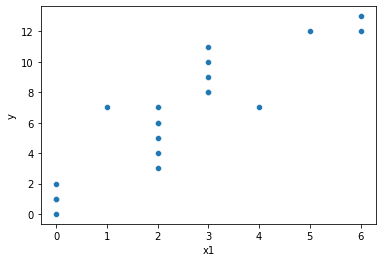

In [22]:
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.scatterplot(df.x1, df.y)

<AxesSubplot:xlabel='x2', ylabel='y'>

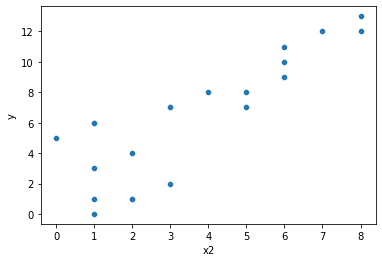

In [23]:
sns.scatterplot(df.x2, df.y)

<AxesSubplot:xlabel='x3', ylabel='y'>

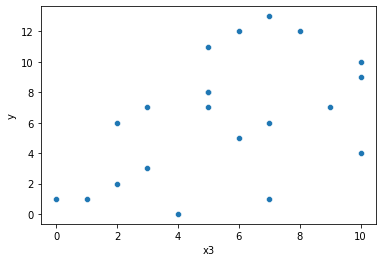

In [24]:
sns.scatterplot(df.x3, df.y) 

In [33]:
X = df.x1
V = df.x2
T = df.x3
Y = df.y

<AxesSubplot:xlabel='x1', ylabel='y'>

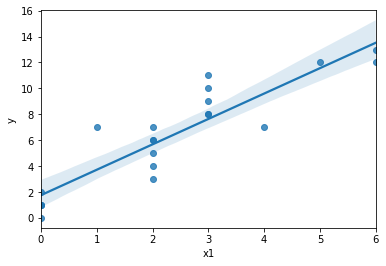

In [34]:
sns.regplot(X, Y)

<AxesSubplot:xlabel='x2', ylabel='y'>

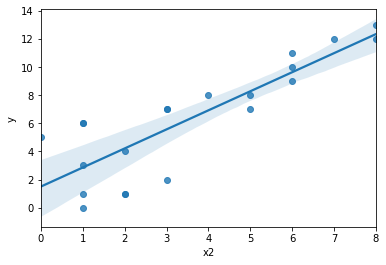

In [35]:
sns.regplot(V, Y)

<AxesSubplot:xlabel='x3', ylabel='y'>

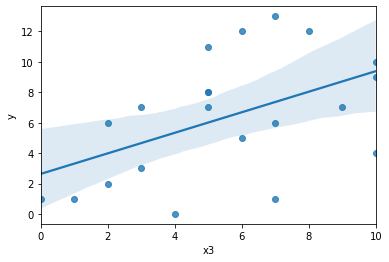

In [36]:
sns.regplot(T, Y)